In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import hairball

In [2]:
#Read the csv without wrong projects

df = pd.read_csv('final_dataset.csv')

df.shape

(231024, 14)

In [3]:
df

,p_ID,Mastery,Default_Names,Duplicated_Code,Dead_Code,Attribute_Initialization,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation,Total Blocks
0,60002538,3,1,0,0,NaN,0,0,0,0,1,1,1,2
1,60034304,16,0,0,4,NaN,3,1,3,2,3,2,2,47
2,60058876,10,1,0,0,NaN,2,0,2,0,2,1,3,82
3,60063608,8,3,1,2,NaN,1,1,0,0,2,2,2,41
4,60068444,6,1,0,0,NaN,0,0,1,0,1,2,2,9
5,60074986,19,1,10,1,NaN,3,3,3,3,3,2,2,825
6,60082620,14,2,2,2,NaN,3,1,1,2,3,2,2,131
7,60122018,15,0,0,0,NaN,1,3,2,3,2,2,2,109
8,60122926,6,0,0,0,NaN,1,0,0,1,1,2,1,65
9,60145364,16,16,11,0,NaN,1,3,2,3,3,2,2,995


## Preguntas de análisis

#### 1. ¿Tienen más o menos TotalMastery los proyectos con bad smells comparados con los que no tienen bad smells?

Proyectos sin bad smells:  35.7590553362 % ( 82612 )
Proyectos con bad smells:  64.2409446638 % ( 148412 )


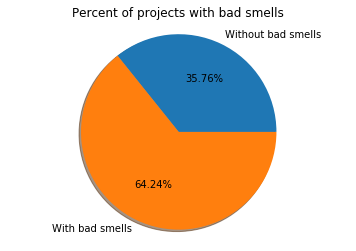

In [4]:
df_correct =  df.loc[(df['Default_Names'] == 0) &
             (df['Duplicated_Code'] == 0) &
             (df['Dead_Code'] == 0)]


df_badsmell = pd.concat([df, df_correct]).drop_duplicates(keep=False)

print "Proyectos sin bad smells: ",100*df_correct.shape[0]/float(df.shape[0]),"% (",df_correct.shape[0],")"
print "Proyectos con bad smells: ",100*df_badsmell.shape[0]/float(df.shape[0]),"% (",df_badsmell.shape[0],")" 

percent_nobadsmells = 100*df_correct.shape[0]/float(df.shape[0])
percent_yesbadsmells = 100*df_badsmell.shape[0]/float(df.shape[0])

labels = ["Without bad smells", "With bad smells"]
plt.pie([percent_nobadsmells, percent_yesbadsmells], labels=labels, autopct='%.2f%%', shadow=True)
plt.axis('equal') 
plt.title('Percent of projects with bad smells')
plt.show()

Text(0.5,1,'Projects with bad smells')

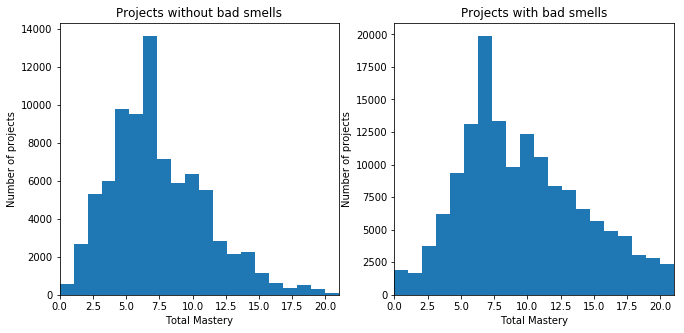

In [5]:

fig, axs = plt.subplots(1,2)

df_correct['Mastery'].plot.hist(ax=axs[0], bins=20, xlim=(0,21), figsize=(11,5))
df_badsmell['Mastery'].plot.hist(ax=axs[1], bins=20, xlim=(0,21))

axs[0].set_xlabel("Total Mastery")
axs[0].set_ylabel("Number of projects")
axs[0].set_title("Projects without bad smells")

axs[1].set_xlabel("Total Mastery")
axs[1].set_ylabel("Number of projects")
axs[1].set_title("Projects with bad smells")

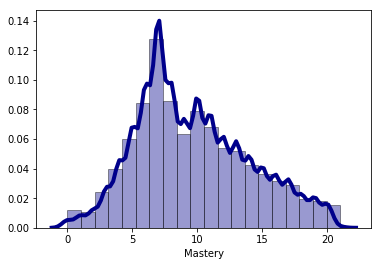

In [6]:
import seaborn as sns

# Density Plot and Histogram 
sns.distplot(df_badsmell['Mastery'],
             bins= 20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#### 2. ¿Tienen más bloques los proyectos que tienen más bad smells?

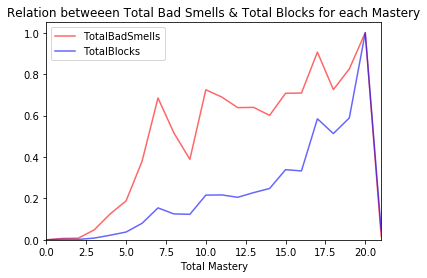

In [7]:
from sklearn import preprocessing

column_names = ['Mastery', 'TotalBlocks', 'TotalBadSmells']

df_aux = pd.DataFrame(columns=column_names)


for i in xrange(22):
    df_mastery = df.loc[df['Mastery'] == i]

    #Sum bad smells 
    default_names = df_mastery['Default_Names'].sum()
    dup_scripts = df_mastery['Duplicated_Code'].sum()
    dead_code = df_mastery['Dead_Code'].sum()
#     att_init = df_mastery['Total AttributeInitialization'].sum()
    total_badsmells = default_names + dup_scripts + dead_code 
   
    #Sum total blocks
    total_blocks = df_mastery['Total Blocks'].sum() 
   
    df2 = pd.DataFrame([[i, total_blocks, total_badsmells]], columns=column_names)
    df_aux = df_aux.append(df2,  ignore_index=True)


# Normalize
x = df_aux[['TotalBlocks','TotalBadSmells']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

df_aux['TotalBlocks'] = df_normalized[0]
df_aux['TotalBadSmells'] = df_normalized[1]

#Plot
plt.plot('Mastery','TotalBadSmells',  data=df_aux, color='red', alpha=0.6)
plt.plot('Mastery', 'TotalBlocks', data=df_aux, color='blue', alpha=0.6)
plt.xlabel('Total Mastery')
plt.title('Relation betweeen Total Bad Smells & Total Blocks for each Mastery')
plt.xlim(0,21)
plt.ylim(0)
plt.legend(loc='best')
plt.show()



#### 3. Los proyectos que presentan un bad smell, ¿tienen de otros tipos? ¿Están relacionados? ¿Se comportan igual?

In [8]:
df[['Default_Names','Dead_Code','Duplicated_Code']].corr()

,Default_Names,Dead_Code,Duplicated_Code
Default_Names,1.000000,0.191911,0.255044
Dead_Code,0.191911,1.000000,0.333780
Duplicated_Code,0.255044,0.333780,1.000000


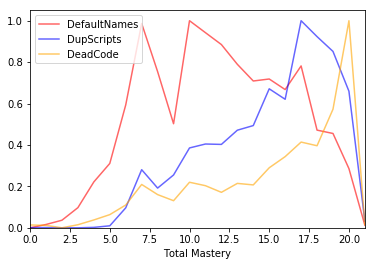

In [9]:
column_names = ['Mastery', 'DefaultNames', 'DupScripts', 'DeadCode']

df_aux = pd.DataFrame(columns=column_names)


for i in xrange(22):
    df_mastery = df.loc[df['Mastery'] == i]

    #Sum bad smells 
    default_names = df_mastery['Default_Names'].sum()
    dup_scripts = df_mastery['Duplicated_Code'].sum()
    dead_code = df_mastery['Dead_Code'].sum()
#     att_init = df_mastery['Total AttributeInitialization'].sum()
   
    df2 = pd.DataFrame([[i, default_names, dup_scripts, dead_code]], columns=column_names)
    df_aux = df_aux.append(df2,  ignore_index=True)


# Normalize
x = df_aux[['DefaultNames','DupScripts', 'DeadCode']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

df_aux['DefaultNames'] = df_normalized[0]
df_aux['DupScripts'] = df_normalized[1]
df_aux['DeadCode'] = df_normalized[2]
# df['AttInit'] = df_normalized[3]



#Plot
plt.plot('Mastery','DefaultNames',  data=df_aux, color='red', alpha=0.6)
plt.plot('Mastery', 'DupScripts', data=df_aux, color='blue', alpha=0.6)
plt.plot('Mastery', 'DeadCode', data=df_aux, color='orange', alpha=0.6)
# plt.plot('Mastery', 'AttInit', data=df, color='green', alpha=0.6)
plt.xlabel('Total Mastery')
# plt.title('Relation betweeen Total Bad Smells & Total Blocks for each Mastery')
plt.xlim(0,21)
plt.ylim(0)
plt.legend(loc='best')
plt.show()


#### 5. ¿Están limitados los proyectos por los bad smells? Bad smells para perfiles avanzados

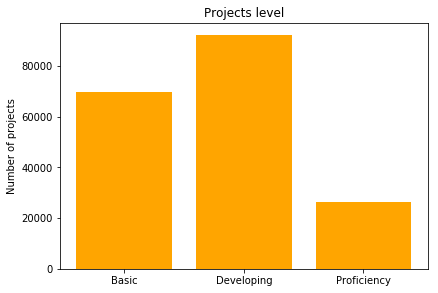

In [10]:
df_basic = df.loc[df['Mastery'] < 7]
df_develop = df.loc[(df['Mastery'] > 7) & (df['Mastery'] < 14)]
df_prof = df.loc[df['Mastery'] > 14]

data = [df_basic.shape[0], df_develop.shape[0], df_prof.shape[0]]
labels = ['Basic', 'Developing', 'Proficiency']

plt.bar(labels, data, color='orange')
plt.tight_layout()
plt.title('Projects level')
plt.ylabel('Number of projects')
plt.show()

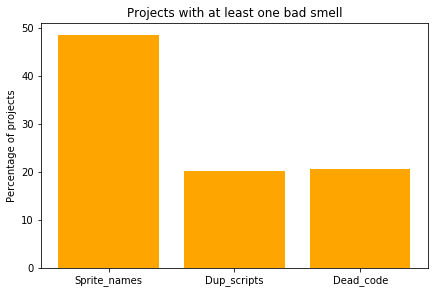

In [12]:
import matplotlib.pyplot as plt

sprite_names = 100*df.loc[df['Default_Names'] != 0].shape[0]/float(df.shape[0])

dup_scripts = 100*df.loc[df['Duplicated_Code'] != 0].shape[0]/float(df.shape[0])

dead_code = 100*df.loc[df['Dead_Code'] != 0].shape[0]/float(df.shape[0])

# attr_init = 100*df.loc[df['Total AttributeInitialization'] != 0].shape[0]/float(df.shape[0])

general_data = [sprite_names, dup_scripts, dead_code]


labels = ['Sprite_names', 'Dup_scripts', 'Dead_code']


plt.bar(labels, general_data, color='orange')
plt.tight_layout()
plt.title('Projects with at least one bad smell')
plt.ylabel('Percentage of projects')
plt.show()

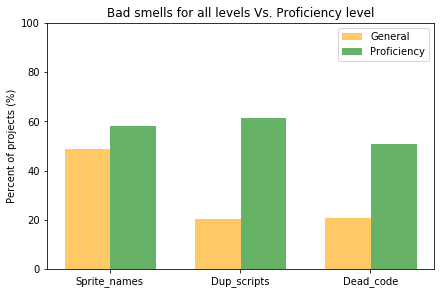

In [13]:

df_prof = df.loc[df['Mastery'] > 14]
df_prof.shape

sprite_names = 100*df_prof.loc[df_prof['Default_Names'] != 0].shape[0]/float(df_prof.shape[0])

dup_scripts = 100*df_prof.loc[df_prof['Duplicated_Code'] != 0].shape[0]/float(df_prof.shape[0])

dead_code = 100*df_prof.loc[df_prof['Dead_Code'] != 0].shape[0]/float(df_prof.shape[0])

# attr_init = 100*df_prof.loc[df_prof['Total AttributeInitialization'] != 0].shape[0]/float(df_prof.shape[0])

prof_data = [sprite_names, dup_scripts, dead_code]

labels = ['Sprite_names', 'Dup_scripts', 'Dead_code']


index = np.arange(3)

plt.bar(index, general_data, alpha=0.6, width=0.35, color='orange', label='General')
plt.bar(index + 0.35, prof_data, alpha=0.6, width=0.35, color='g', label='Proficiency')

plt.tight_layout()
plt.ylabel('Percent of projects (%)')
plt.title('Bad smells for all levels Vs. Proficiency level')
plt.legend()
plt.xticks(index + 0.17, labels)
plt.ylim(0,100)
plt.show()



In [14]:

sprite_names = 100*df_develop.loc[df_develop['Default_Names'] != 0].shape[0]/float(df_develop.shape[0])

dup_scripts = 100*df_develop.loc[df_develop['Duplicated_Code'] != 0].shape[0]/float(df_develop.shape[0])

dead_code = 100*df_develop.loc[df_develop['Dead_Code'] != 0].shape[0]/float(df_develop.shape[0])

# attr_init = 100*df_develop.loc[df_develop['Total AttributeInitialization'] != 0].shape[0]/float(df_develop.shape[0])

develop_data = [sprite_names, dup_scripts, dead_code]

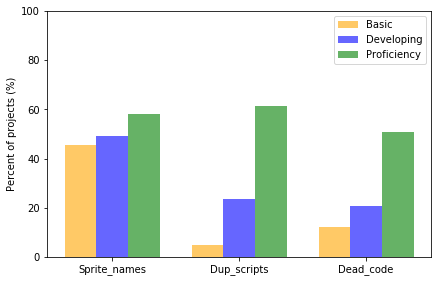

In [16]:

df_basic = df.loc[df['Mastery'] < 8]

sprite_names = 100*df_basic.loc[df_basic['Default_Names'] != 0].shape[0]/float(df_basic.shape[0])

dup_scripts = 100*df_basic.loc[df_basic['Duplicated_Code'] != 0].shape[0]/float(df_basic.shape[0])

dead_code = 100*df_basic.loc[df_basic['Dead_Code'] != 0].shape[0]/float(df_basic.shape[0])

# attr_init = 100*df_basic.loc[df_basic['Total AttributeInitialization'] != 0].shape[0]/float(df_basic.shape[0])

basic_data = [sprite_names, dup_scripts, dead_code]

labels = ['Sprite_names', 'Dup_scripts', 'Dead_code']


index = np.arange(3)

plt.bar(index - 0.25, basic_data, alpha=0.6, width=0.25, color='orange', label='Basic')
plt.bar(index, develop_data, alpha=0.6, width=0.25, color='blue', label='Developing')
plt.bar(index + 0.25, prof_data, alpha=0.6, width=0.25, color='g', label='Proficiency')

plt.tight_layout()
plt.ylabel('Percent of projects (%)')
plt.legend()
plt.xticks(index, labels)
plt.ylim(0,100)
plt.show()

